# Data Analysis - Programming
## Week 6
## Oefeningen

In [1]:
%pylab
%matplotlib inline
import scipy.stats as st

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


### Oefening 1 <img src="images/stars_1.png" alt="1 star" style="display: inline; margin-top: -5px" />

Blader hoofdstuk 4 van "Python for Data Analysis" door.

Probeer voor jezelf de volgende vragen te beantwoorden:
- hoe maak je een nieuwe array
- hoe wijs je elementen, rijen en kolommen aan in een array
- hoe pas je functies toe op elementen, rijen of kolommen in een array

### Oefening 2 <img src="images/stars_2.png" alt="2 star" style="display: inline; margin-top: -5px" />

Bij Data Analysis heb je drie methoden geleerd om, op basis van een steekproef, te mogen vermoeden dat een variabele normaal verdeeld is.


Schrijf voor iedere methode een functie die je ondersteunt bij het onderzoek van een opgegeven dataset.  
De functies nemen één argument, de dataset als een NumPy array, en voeren daarop het onderzoekje uit.  
Je functie hoeft geen conclusies te trekken over de normaliteit van de data, maar alleen de kenmerkende gegevens te presenteren, zodat de gebruiker zelf de conclusie kan trekken.

Je kunt, om twee vliegen in één klap te slaan, de data van opgave 1 van opgaven van het deel statistiek vinden in `data/opgaven_01.txt`.

Method 1:


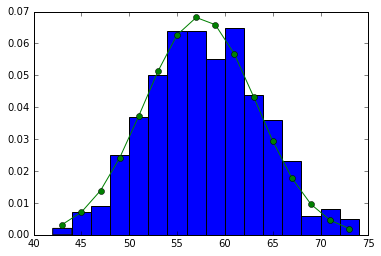

Method 2:
Percentage of data within 1 std: 68.40%
Percentage of data within 2 std: 95.60%
Percentage of data within 3 std: 100.00%
Method 3:


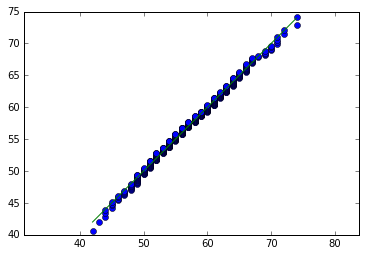

In [212]:
# opgave 2

def suggest_num_bins(data):
    # suggests number of bins for histogram
    # using Freedman-Diaconis rule of thumb
    IQR = np.percentile(data, 75) - np.percentile(data, 25)
    bin_width = 2 * IQR * (len(data)**(-1/3))
    return np.ceil((data.max() - data.min()) / bin_width)


def assess_normality_01(data, ddof=1, assume_discrete=False):
    # eerste methode: grafische controle
    if assume_discrete:
        bins = arange(min(data), max(data) + 2) - 0.5
        freq, bins, _ = plt.hist(data, bins=bins, normed=True)
    else:
        num_bins = suggest_num_bins(data)
        freq, bins, _ = plt.hist(data, bins=num_bins, normed=True)
    X = st.norm(data.mean(), data.std(ddof=ddof))
    x = (bins[1:] + bins[:-1]) / 2
    y = X.pdf(x)
    print("Method 1:")
    plt.plot(x, y, marker="o")
    plt.show()


def assess_normality_02(data, ddof=1):
    # tweede methode: grenzen std bepalen
    mu, stddev = data.mean(), data.std(ddof=ddof)
    print("Method 2:")
    for i in range(1, 4):
        within_std = sum(np.abs(data - mu) < i * stddev)
        print(
            "Percentage of data within {} std: {:.2f}%".format(
                i, 100 * (within_std / data.size)
            )
        )


def assess_normality_03(data, ddof=1):
    # derde methode: normal probability plot
    print("Method 3:")
    X = st.norm(data.mean(), data.std(ddof=1))
    x = sort(data)
    probs = linspace(1, len(x), num=len(x)) / len(x)
    y = X.ppf(probs)
    plt.plot(x[:-1], y[:-1], "o ")
    plt.plot([x.min(), x.max()], [x.min(), x.max()], "-")
    plt.axis('equal')
    plt.show()

    
sample = loadtxt("data/opgave_01.txt")
assess_normality_01(sample)
assess_normality_02(sample)
assess_normality_03(sample)

### Oefening 3 <img src="images/stars_3.png" alt="3 star" style="display: inline; margin-top: -5px" />

Om een beetje feeling te krijgen met zelf verzamelen en verwerken van gegevens, ga je in deze oefening normaliteit van verschillende variabelen onderzoeken. Je krijgt daarbij geen data aangeleverd. Het is de bedoeling dat je zelf de bijbehorende gegevens opzoekt op internet.

Onderzoek met behulp van de aangedragen methoden of de volgende variabelen normaal verdeeld zijn:  
<span>a.</span> de gemiddelde dagtemperatuur in Nederland in 2015.  
<span>b.</span> de slotkoers van de AEX-index in 2015.  
<span>c.</span> de lengte (aantal letters) van voornamen van jongens (babynamen) in 2015.

Method 1:


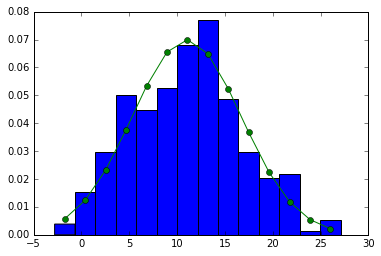

Method 2:
Percentage of data within 1 std: 66.30%
Percentage of data within 2 std: 96.44%
Percentage of data within 3 std: 100.00%
Method 3:


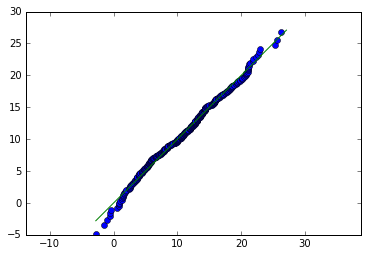

In [214]:
# opgave 3a
# data afkomstig van:
# http://projects.knmi.nl/klimatologie/daggegevens/selectie.cgi
data = loadtxt("data/oefening_week_06/KNMI_20151231.txt", delimiter=",", dtype=np.float64, usecols=(2, )) / 10
assess_normality_01(data, ddof=0)
assess_normality_02(data, ddof=0)
assess_normality_03(data, ddof=0)

Method 1:


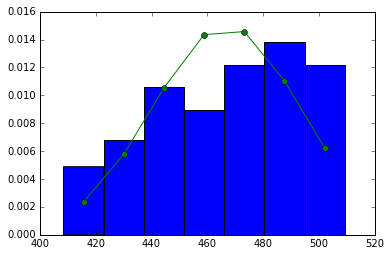

Method 2:
Percentage of data within 1 std: 59.77%
Percentage of data within 2 std: 97.66%
Percentage of data within 3 std: 100.00%
Method 3:


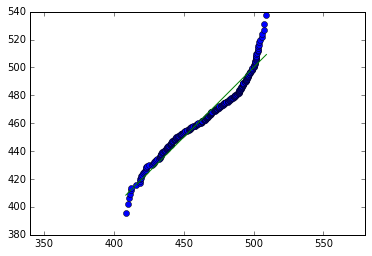

In [215]:
# opgave 3b
# data afkomstig van:
# https://finance.yahoo.com/q/hp?s=%5EAEX&a=00&b=1&c=2015&d=11&e=31&f=2015&g=d
data = loadtxt("data/oefening_week_06/aex_koersen_2015.csv", delimiter=",", dtype=np.float64, usecols=(4, ), skiprows=1)
assess_normality_01(data, ddof=0)
assess_normality_02(data, ddof=0)
assess_normality_03(data, ddof=0)

Method 1:


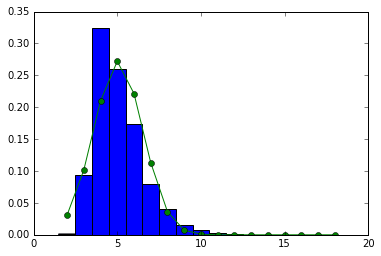

Method 2:
Percentage of data within 1 std: 75.84%
Percentage of data within 2 std: 93.27%
Percentage of data within 3 std: 98.93%
Method 3:


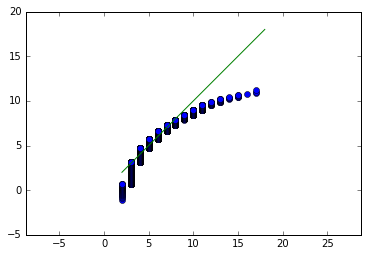

In [213]:
# opgave 3c
# data afkomstig van:
# https://www.svb.nl/int/nl/kindernamen/artikelen/zoeknaam/jongensnamen/jongens_alfabetisch.jsp
from collections import Counter

def filter_name(name):
    return "".join([letter for letter in name if letter.isalpha()])


def read_name_data(filename):
    name_lengths = Counter()
    with open(filename, "r", encoding="utf-8") as f:
        f.readline()  # skip header line
        for line in f:
            name, repetitions, _ = line.split("\t")
            name_length = len(filter_name(name))
            name_lengths[name_length] += int(repetitions)
    data = fromiter(name_lengths.elements(), dtype=int_)
    return data

    
data = read_name_data("data/oefening_week_06/jongensnamen_2015.txt")

assess_normality_01(data, ddof=0, assume_discrete=True)
assess_normality_02(data, ddof=0)
assess_normality_03(data, ddof=0)